Following this: https://towardsdatascience.com/30-examples-to-master-pandas-f8a2da751fa4

In [1]:
# Importing libraries
import numpy as np
import pandas as pd

In [10]:
# Prepping the data
df = pd.read_csv('Churn_Modelling.csv')
print(df.shape)
print(df.columns)

(10000, 14)
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [11]:
# Dropping four of the columns (axis = 1 for columns, inplace = T to save changes)
df.drop(['RowNumber', 'CustomerId', 'Surname', 'CreditScore'], axis = 1, inplace = True)
df.shape

(10000, 10)

In [13]:
# Reading only some of the columns 
df_spec = pd.read_csv('Churn_Modelling.csv', usecols = ['Gender', 'Age', 'Tenure', 'Balance'])
df_spec.head()

,Gender,Age,Tenure,Balance
0,Female,42,2,0.00
1,Female,41,1,83807.86
2,Female,42,8,159660.80
3,Female,39,1,0.00
4,Female,43,2,125510.82


In [15]:
# Reading only some of the rows (nrows = 5000 to read the first 5000, use skiprows to instead skip)
df_partial = pd.read_csv('Churn_Modelling.csv', nrows = 5000)
df_partial.shape

(5000, 14)

In [17]:
# Sampling by number of obs or fraction of the dataset
df_sample = df.sample(n = 1000)
print(df_sample.size)

df_sample = df.sample(frac = 0.2)
print(df_sample.size)

10000
20000


In [20]:
# Check for na
df.isna().sum()

Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Imputing values & dealing with N/A

In [31]:
# Get random index for imputation, just for this exercise
index = np.random.randint(len(df.index), size = 20)

In [38]:
# Creating a vector with mean imputation (most common value for Geography)
mean_impute = [round(np.mean(df.Balance), 1), df['Geography'].value_counts().idxmax()]

In [39]:
# Impute mean
df.loc[index, ['Balance', 'Geography']] = mean_impute

In [44]:
# Impute na (also just for exersice), now using iloc
df.iloc[index, -1] = np.nan
df.isna().sum()

In [48]:
# Handling na, first by filling with 0 then by dropping
df['Exited'].fillna(value = 0, inplace = False) # Not saving it, since I will instead drop them
df.dropna(axis = 0, how = 'any', inplace = True)

## Selection

In [54]:
# Select rows by condition
france_churn = df[(df.Geography == 'France') & (df.Exited == 1)]
france_churn.describe()

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.0
mean,45.148515,5.000000,71188.494505,1.477723,0.701733,0.366337,103457.851089,1.0
std,9.776827,2.951907,66878.422991,0.817709,0.457781,0.482101,57519.913255,0.0
min,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,123.070000,1.0
25%,38.000000,2.000000,0.000000,1.000000,0.000000,0.000000,55791.582500,1.0
50%,45.000000,5.000000,80376.460000,1.000000,1.000000,0.000000,103739.240000,1.0
75%,52.000000,8.000000,128941.742500,2.000000,1.000000,1.000000,154961.152500,1.0
max,84.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199378.580000,1.0


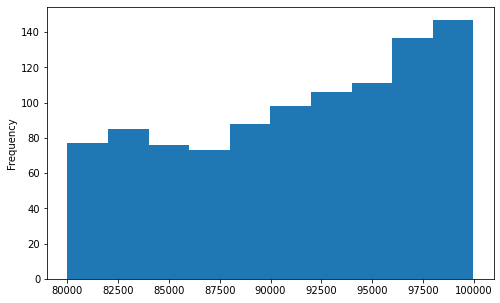

In [55]:
# Describing condition with query
df2 = df.query('80000 < Balance < 100000')
df2['Balance'].plot(kind = 'hist', figsize = (8,5))

In [56]:
# isin condition
df[df['Tenure'].isin([4,6,9,10])][:3]

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,Germany,Female,29,4,115046.74,4,1,0,119346.88,1.0
8,France,Male,44,4,142051.07,2,0,1,74940.50,0.0
10,France,Male,31,6,102016.72,2,0,0,80181.12,0.0


## Summary tools

In [57]:
# Group by country and gender and display average churn rate
df[['Geography', 'Gender', 'Exited']].groupby(['Geography', 'Gender']).mean()

Exited
Geography Gender          
France    Female  0.203194
          Male    0.127273
Germany   Female  0.375630
          Male    0.277778
Spain     Female  0.212511
          Male    0.130686

In [59]:
# Multiple aggregate functions
df[['Geography', 'Gender', 'Exited']].groupby(['Geography', 'Gender']).agg(['mean', 'median', 'count'])

Exited             
                      mean median count
Geography Gender                       
France    Female  0.203194    0.0  2254
          Male    0.127273    0.0  2750
Germany   Female  0.375630    0.0  1190
          Male    0.277778    0.0  1314
Spain     Female  0.212511    0.0  1087
          Male    0.130686    0.0  1385

In [74]:
# Different aggregate functions to different groups
summary = df[['Geography', 'Exited', 'Balance']].groupby('Geography').agg({'Exited':'sum', 'Balance':'mean'})

# Changing to the correct column name
summary.rename(columns = {'Exited':'Sum of exited customers', 'Balance':'Mean balance'}, inplace = True)

# Changing summation to int
summary.iloc[:,0] = summary.iloc[:,0].astype(int)

summary

,Sum of exited customers,Mean balance
Geography,,
France,808,62113.054508
Germany,812,119742.500535
Spain,412,61859.753439


In [73]:
# Easier approach
summary = df[['Geography', 'Exited', 'Balance']].groupby('Geography')

Geography
France     808.0
Germany    812.0
Spain      412.0
Name: Sum of exited customers, dtype: float64